# Appling machine learning to audio analysis

First we want to upload our labeled and unlabeled dataset for future use to train our model

In [2]:
### Dependencies were already installed previously on ubuntu
### Comet: experiment tracking and visual tools

from comet_ml import Experiment

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa # audio analysis
import librosa.display # this submodule needs to be imported explicitly
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import os

In [3]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
# Sequential: creates a sequential model, ideal to create plain stack of layers
# each layer has exactly one input tensor and one output tensor

# Layers: basic building blacks of neural networks in Keras, consists of a
# tensor-in and tensor-out computation function and some state

# Dense, Dropout and Activartion are classes from layers:
# Activation and dense: Core layers. Activation applies an activation function
# to an output. The output has the same shape as the input.
# Dropout: regularization layer.

# Adam: it's an algorithm, an optimization, stochastic gradient descent method
#based on adaptive estimation of first and second order moments.

# to_categorical: converts a class vectors (integers) to a binary class matrix


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# Keras now is fully integrated to Tensorflow, so to_categorical and Adam
# can't be imported directly from keras, therefore, the update:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2021-12-05 15:39:39.585221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-05 15:39:39.585271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
# Create a Comet Experiment, to capture any and all artifacts
# such as audio files, visualization, model, dataset, system information and training metrics
experiment = Experiment(api_key = "Xa6eGiuYFngDcAJ9PVY1WpZp0", project_name = "SetA")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/negromontebs/seta/f43f4c6c6e9b4d4d9f836dfdb0225585



In [7]:
# Load dataset
df = pd.read_csv('set_a.csv')


# Create a list of the labels. Currently there are 5 labels: 'artifact', 'extrahls', 'murmur', 'normal', 'unlab'
labels = list(df['label'].unique())

In [8]:
# grabs a single audio file from each class
files = dict()
datasetSize = 1

#Iteration over the labels and 

for i in range(len(labels)):
    
    #if the dataset contains itens with  the iterated label
    labelBoolean = (df['label'] == labels[i])
    #pick those items and make a new dataFrame with a spefic size
    dfItem = df[labelBoolean][:datasetSize]
    #reset the index to for easier selection
    tmp = dfItem.reset_index()
    #string with the directory
    path = '{}'.format(tmp['fname'][0])
    #print (path) #[0] was taken off, error in range
    #save the string to the dictionary
    files[labels[i]] = path


set_a/artifact__201012172012.wav
set_a/extrahls__201101070953.wav
set_a/murmur__201101051104.wav
set_a/normal__201101070538.wav
set_a/Aunlabelledtest__201012172010.wav


{'web': 'https://www.comet.ml/api/image/download?imageId=554c5a6cef1e4086b996afa50c61d397&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=554c5a6cef1e4086b996afa50c61d397&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'imageId': '554c5a6cef1e4086b996afa50c61d397'}

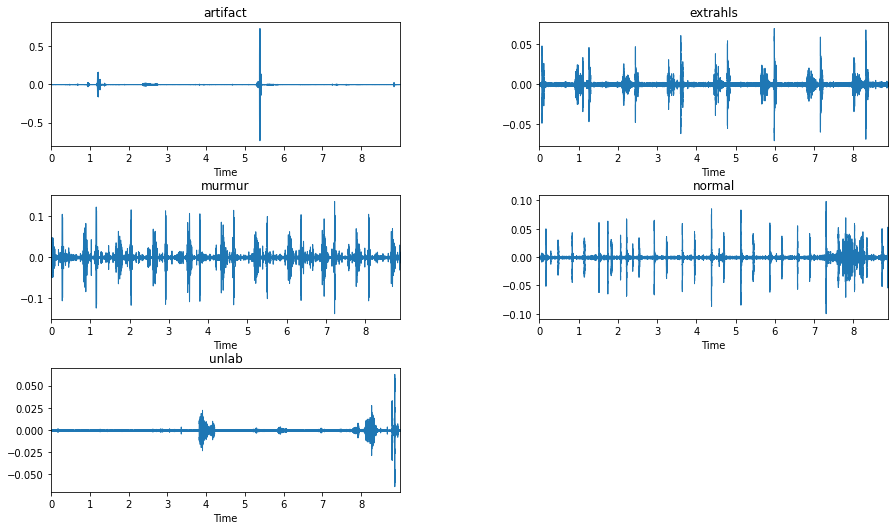

In [9]:
# To plot the waveforms, using librosa's display.waveplot function:

fig = plt.figure(figsize=(15,15))
#experiment.log_image('label_examples.png')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)


for i, lab in enumerate(labels):
    # i = index
    # lab = name of the label at current index
    fn = files[lab]
    print(fn)
    fig.add_subplot(5,2,1+i)
    plt.title(lab)
    data, sample_rate = librosa.load(fn)
    librosa.display.waveplot(data, sr = sample_rate)
    
plt.savefig('label_examples.png')

# Log graphic of waveforms to comet:
experiment.log_image('label_examples.png')

In [10]:
# Log audio files to Comet for debugging
for label in labels:
    fn = files[label]
    experiment.log_audio(fn, metadata = {'name': label})

In [11]:
# COMET WARNING: As you are running in a Jupyter environment, 
# you will need to call `experiment.end()` when finished to 
# ensure all metrics and code are logged before exiting.

### LEMBRAR DE RETIRAR DE COMENT PRA FINALIZAR
# experiment.end() 

## Preprocessing

In [12]:
#pick an audio file
fn = files["artifact"]
#get its sample rate and librosa sample rate and bit depth
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)

print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original sample rate: 44100
Librosa sample rate: 22050
Original audio file min~max range: -23887 to 23072
Librosa audio file min~max range: -0.73 to -0.73


{'web': 'https://www.comet.ml/api/image/download?imageId=747dcb88f40b42f789bb6800ebb87299&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=747dcb88f40b42f789bb6800ebb87299&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'imageId': '747dcb88f40b42f789bb6800ebb87299'}

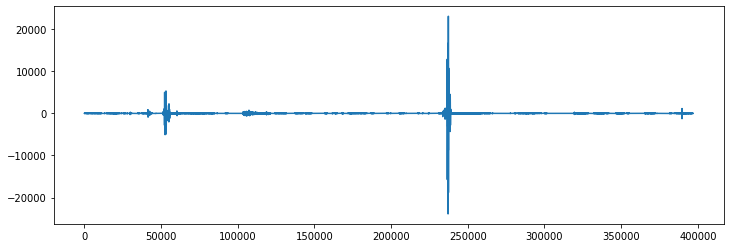

In [13]:
#plot the original audio
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')
experiment.log_image('original_audio.png')

{'web': 'https://www.comet.ml/api/image/download?imageId=53423c739e6c4dd9a9f894a71cdd9b2a&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=53423c739e6c4dd9a9f894a71cdd9b2a&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'imageId': '53423c739e6c4dd9a9f894a71cdd9b2a'}

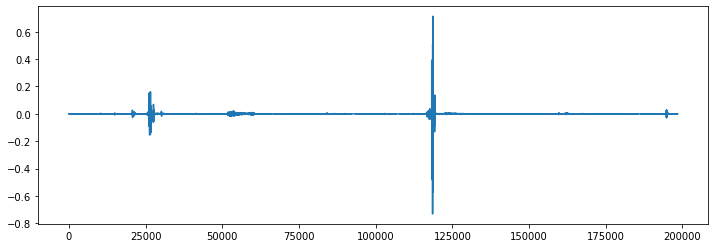

In [14]:
# plot the librosa audio mono sound
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.savefig('librosa_audio.png')
experiment.log_image('librosa_audio.png')

## MFCCs - Mel-Frequency Cepstrum Coefficients

### Extract coefficients from only one file

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 388)


{'web': 'https://www.comet.ml/api/image/download?imageId=bd4ccdf11cc8407d8c9d8631e3454d7a&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=bd4ccdf11cc8407d8c9d8631e3454d7a&experimentKey=f43f4c6c6e9b4d4d9f836dfdb0225585',
 'imageId': 'bd4ccdf11cc8407d8c9d8631e3454d7a'}

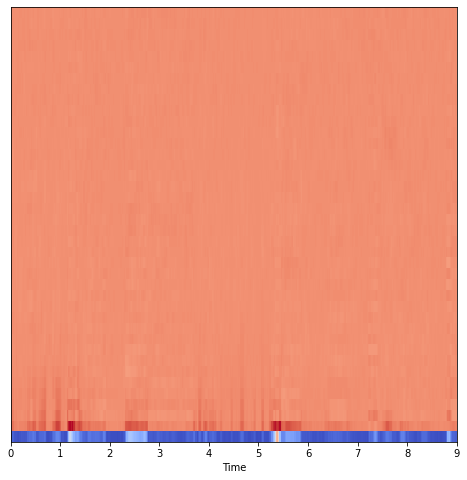

In [16]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')
experiment.log_image('MFCCs.png')

### Function to extract the MFCCs from every file in our dataset

In [17]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [18]:
features = []# Iterate through each sound file and extract the features 

for index, row in df.iterrows():
    
    absolutePath = os.path.abspath("")
    fname = str(row["fname"])
    file_name = os.path.join(absolutePath,fname)
    
    class_label = row["label"]
    data = extract_features(file_name)

    
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [19]:
featuresdf.head()

,feature,class_label
0,"[-594.53345, 39.48496, 4.773615, 6.360032, 2.7...",artifact
1,"[-756.76984, 38.06422, -12.761636, 5.586702, -...",artifact
2,"[-568.246, 48.002598, -25.640783, 8.441813, -2...",artifact
3,"[-299.85703, 112.79045, -22.194496, 28.633465,...",artifact
4,"[-296.34073, 102.59627, -18.80507, 15.606756, ...",artifact


In [20]:
featuresdf.iloc[0]['feature']

array([-5.9453345e+02,  3.9484959e+01,  4.7736149e+00,  6.3600321e+00,
        2.7210441e+00,  1.9556358e+00, -1.5586532e+00, -1.5916940e+00,
       -4.1285987e+00, -9.4592869e-01, -2.9675467e+00, -2.1387017e+00,
       -3.4743207e+00, -1.7667232e+00, -2.4402936e+00, -1.8360806e+00,
       -2.1535695e+00, -1.2188101e+00, -1.6877983e+00, -1.3186961e+00,
       -1.6294661e+00, -1.5636450e+00, -1.0807190e+00, -1.5055786e+00,
       -9.3540710e-01, -9.4582045e-01, -6.7552823e-01, -4.6510810e-01,
       -5.9152031e-01, -6.3035971e-01, -3.6442605e-01, -2.2027926e-01,
       -5.5047251e-02,  1.7959123e-02, -7.3863313e-02, -2.9855010e-01,
        4.0030742e-01,  3.0644944e-01,  2.5131455e-01,  2.2699493e-01],
      dtype=float32)

In [21]:
#experiment.end()

## Model building and training

In [22]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

### Trainning and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

### Neural Network architecture

In [27]:
num_labels = yy.shape[1]

filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    
    return model

model = build_model_graph()

# Display model architecture summary 
model(x_train)
model.summary()# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (140, 256)                10496     
                                                                 
 activation_9 (Activation)   (140, 256)                0         
                                                                 
 dropout_6 (Dropout)         (140, 256)                0         
                                                                 
 dense_10 (Dense)            (140, 256)                65792     
                                                                 
 activation_10 (Activation)  (140, 256)                0         
                                                                 
 dropout_7 (Dropout)         (140, 256)                0         
                                                                 
 dense_11 (Dense)            (140, 5)                 

### Model Trainning

In [35]:
num_epochs = 100
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Epoch 1/100
5/5 [==============================] - 0s 42ms/step - loss: 0.7835 - accuracy: 0.6071 - val_loss: 1.4657 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 0s 38ms/step - loss: 0.7902 - accuracy: 0.6500 - val_loss: 1.4598 - val_accuracy: 0.4444
Epoch 3/100
5/5 [==============================] - 0s 33ms/step - loss: 0.7747 - accuracy: 0.6143 - val_loss: 1.4745 - val_accuracy: 0.4722
Epoch 4/100
5/5 [==============================] - 0s 42ms/step - loss: 0.8705 - accuracy: 0.5643 - val_loss: 1.4746 - val_accuracy: 0.6389
Epoch 5/100
5/5 [==============================] - 0s 39ms/step - loss: 0.6935 - accuracy: 0.6929 - val_loss: 1.4179 - val_accuracy: 0.5833
Epoch 6/100
5/5 [==============================] - 0s 30ms/step - loss: 0.7832 - accuracy: 0.5571 - val_loss: 1.3860 - val_accuracy: 0.6111
Epoch 7/100
5/5 [==============================] - 0s 37ms/step - loss: 0.6819 - accuracy: 0.6929 - val_loss: 1.3827 - val_accuracy: 0.5833
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 29ms/step - loss: 0.7296 - accuracy: 0.6643 - val_loss: 1.4886 - val_accuracy: 0.5278
Epoch 60/100
5/5 [==============================] - 0s 31ms/step - loss: 0.7303 - accuracy: 0.6714 - val_loss: 1.4955 - val_accuracy: 0.5000
Epoch 61/100
5/5 [==============================] - 0s 28ms/step - loss: 0.7872 - accuracy: 0.6643 - val_loss: 1.5358 - val_accuracy: 0.5278
Epoch 62/100
5/5 [==============================] - 0s 34ms/step - loss: 0.6969 - accuracy: 0.6786 - val_loss: 1.5641 - val_accuracy: 0.5278
Epoch 63/100
5/5 [==============================] - 0s 29ms/step - loss: 0.6687 - accuracy: 0.6786 - val_loss: 1.5371 - val_accuracy: 0.5000
Epoch 64/100
5/5 [==============================] - 0s 30ms/step - loss: 0.6821 - accuracy: 0.7000 - val_loss: 1.5182 - val_accuracy: 0.5278
Epoch 65/100
5/5 [==============================] - 0s 28ms/step - loss: 0.6866 - accuracy: 0.7143 - val_loss: 1.5359 - val_accuracy: 0.5278
Epoch 66/100
5/5 [========